In [1]:
import os
import sys
sys.path.append('../')
import numpy as np
from numpy.random import shuffle
import h5py
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
# from torchvision.transforms.functional import adjust_sharpness
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

### Load Data

In [2]:
data_path = '/mnt/WD6TB/tianaoli/Mice/'
data = h5py.File(os.path.join(data_path, 'mice_full_recon.mat'))
mice_full_recon = np.array(data['full_recon_all'])
shuffle(mice_full_recon)
print(mice_full_recon.shape)

(274, 512, 512)


### Full View (512) Images

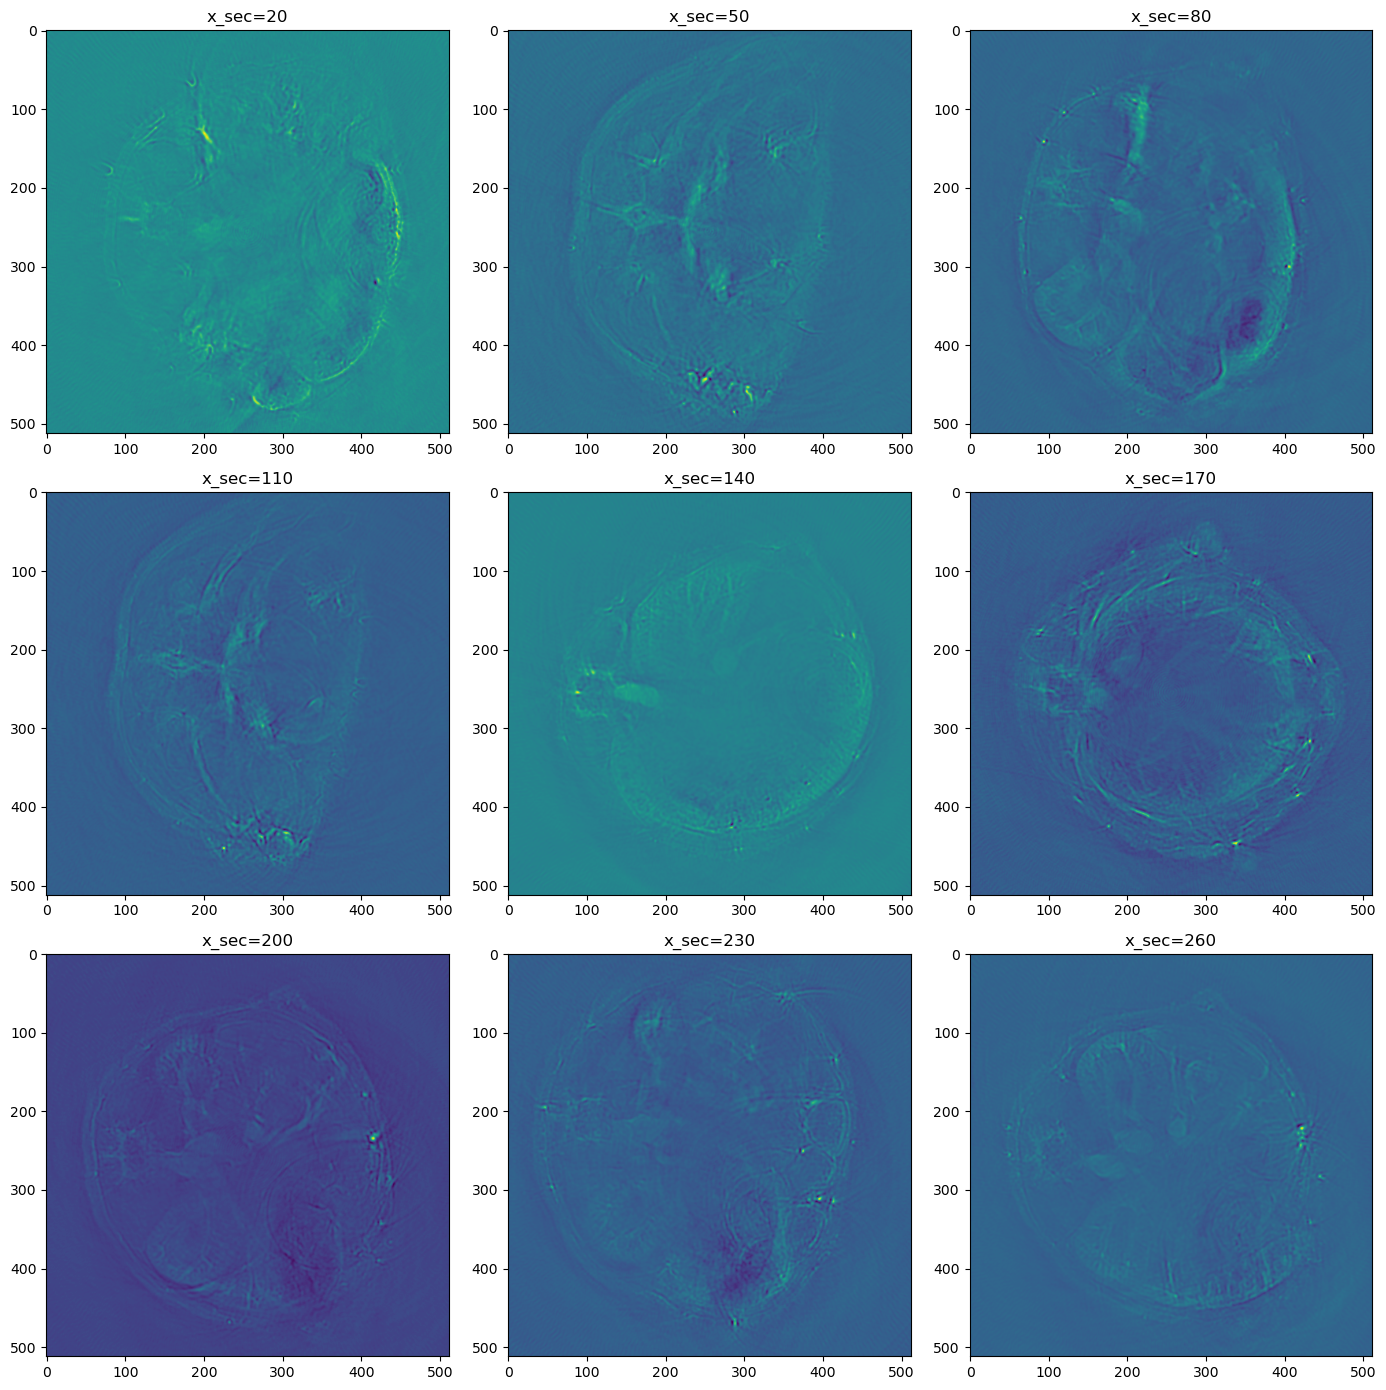

In [3]:
plt.figure(figsize=(14,14))
for i in range(9):
    x_sec = 20 + 30 * i
    plt.subplot(3,3,i+1)
    plt.imshow(mice_full_recon[x_sec,:,:])
    plt.title(f'x_sec={x_sec}')
plt.tight_layout()

### Hisotgram

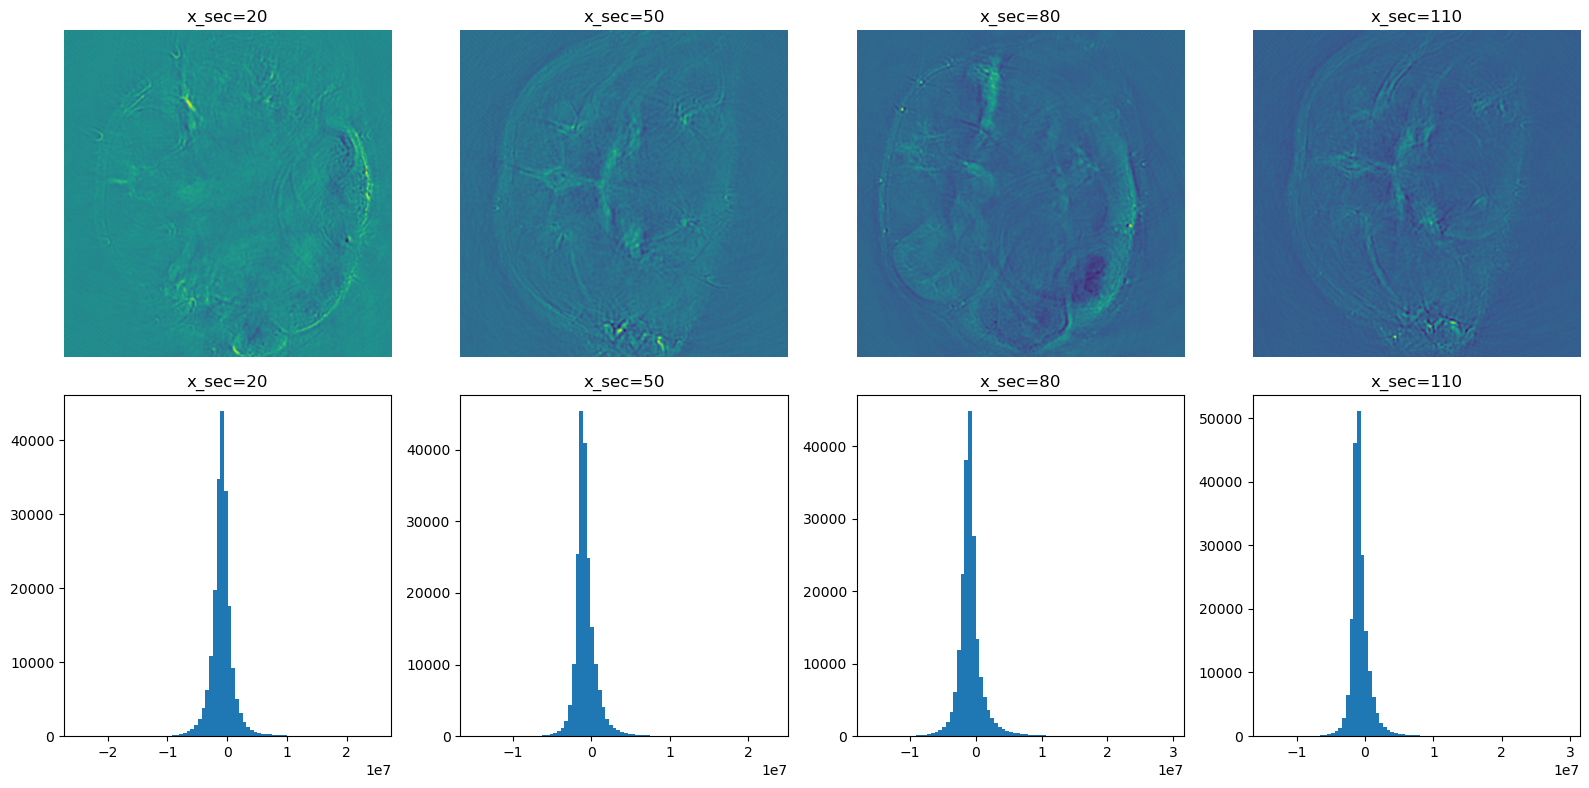

In [4]:
fig = plt.figure(figsize=(16,8))
clip = 32
for i in range(4):
    x_sec = 20 + 30 * i
    plt.subplot(2,4,i+1)
    plt.imshow(mice_full_recon[x_sec,clip:-clip,clip:-clip,])
    plt.title(f'x_sec={x_sec}')
    plt.axis('off')
    
    plt.subplot(2,4,i+5)
    plt.hist(mice_full_recon[x_sec,clip:-clip,clip:-clip,].ravel(), bins=80)
    plt.title(f'x_sec={x_sec}')
    
plt.tight_layout()

### Resizing, Centering and Cropping

In [5]:
def center(img):
    Nx, Ny = img.shape
    x_sum, y_sum = 0, 0
    for i in range(Nx):
        for j in range(Ny):
            x_sum += i * img[i,j]
            y_sum += j * img[i,j]
    x = int(x_sum / img.sum())
    y = int(y_sum / img.sum())
    return (x, y)

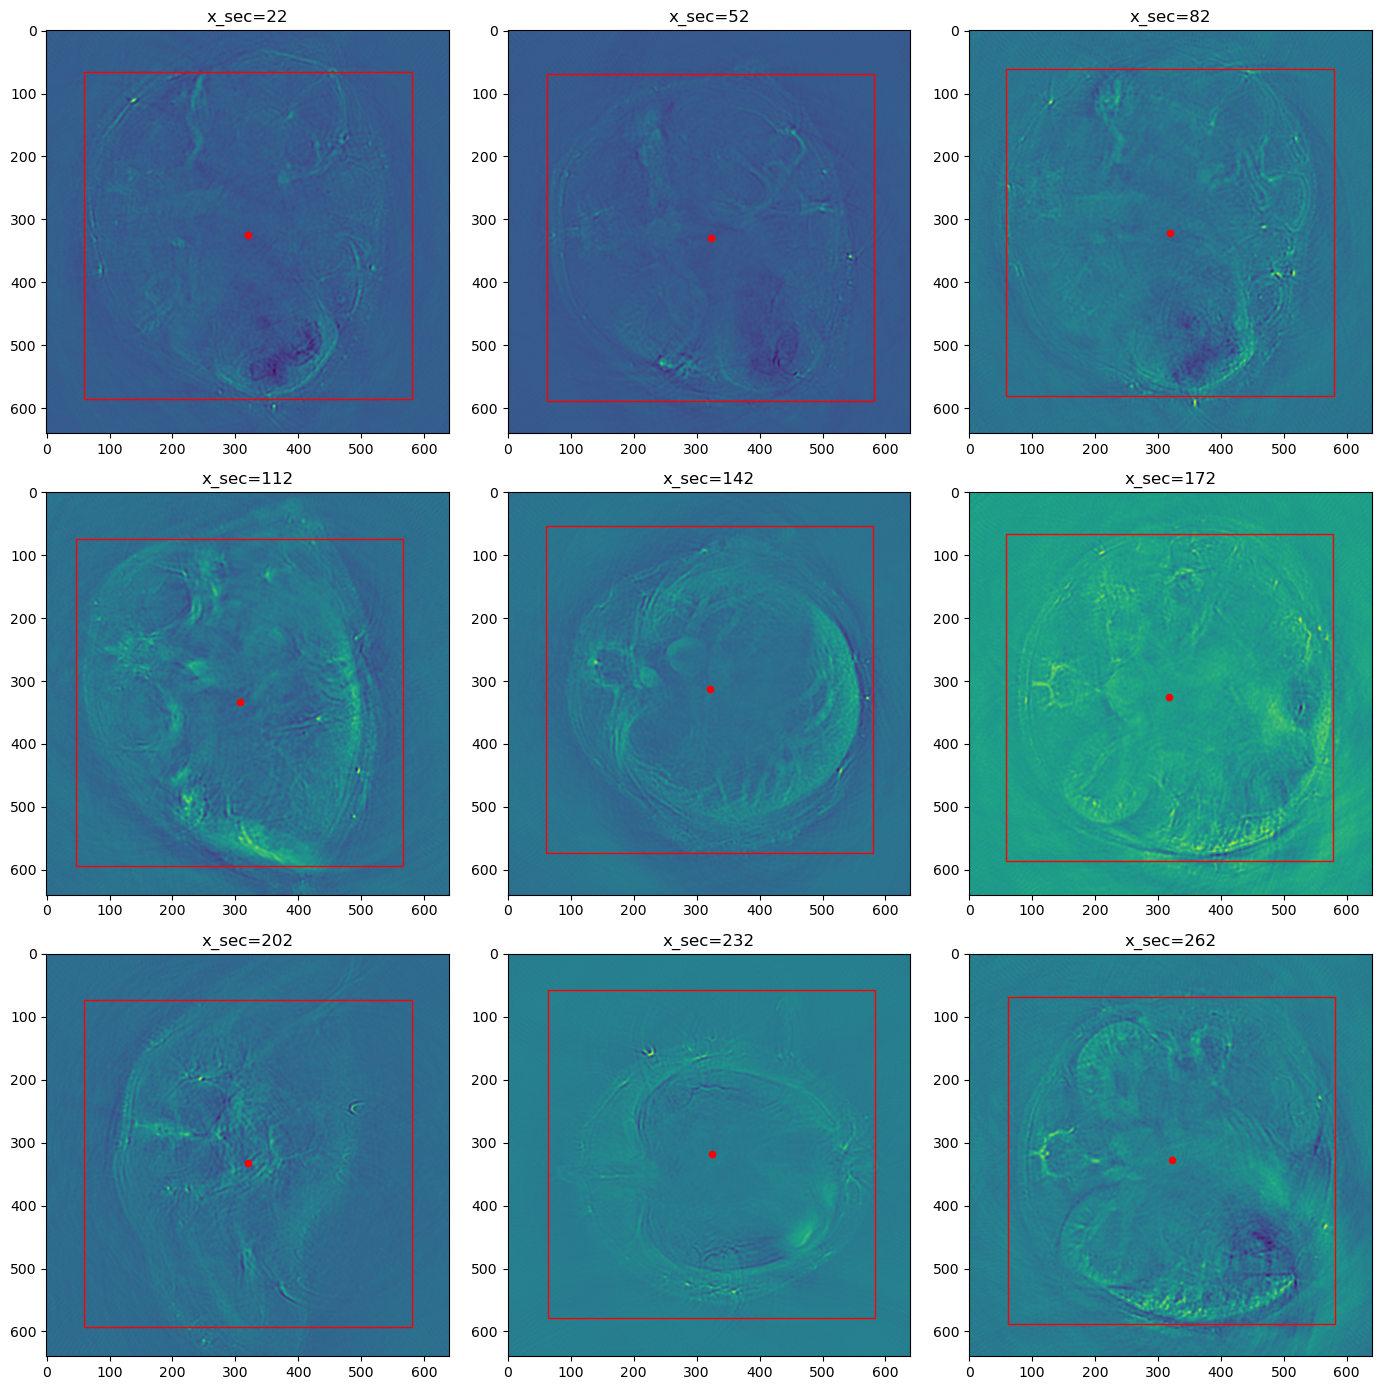

In [6]:
img_size = 520
plt.figure(figsize=(14,14))
for i in range(9):
    x_sec = 22 + 30 * i
    ax = plt.subplot(3,3,i+1)
    img = mice_full_recon[x_sec,:,:]
    img = cv2.resize(img, (640, 640))
    ax.imshow(img)
    plt.title(f'x_sec={x_sec}')
    
    x_c, y_c = center(img)
    ax.scatter(x_c, y_c, s=20, c='red', marker='o')
    circ = Rectangle((x_c-img_size/2, y_c-img_size/2), img_size, img_size, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(circ)
    plt.title(f'x_sec={x_sec}')
plt.tight_layout()

In [7]:
for i in range(mice_full_recon.shape[0]):
    img = mice_full_recon[i,:,:]
    img = cv2.resize(img, (640, 640))
    x_c, y_c = center(img)
    if x_c < 280 or x_c > 360 or y_c < 280 or y_c > 360:
        print(i, x_c, y_c)

### Sparse

In [8]:
# data = h5py.File(os.path.join(data_path, 'mice_sparse4_recon.mat'))
# mice_sparse4_recon = np.array(data['sparse4_recon_all'])
# data = h5py.File(os.path.join(data_path, 'mice_sparse8_recon.mat'))
# mice_sparse8_recon = np.array(data['sparse8_recon_all'])
# data = h5py.File(os.path.join(data_path, 'mice_sparse16_recon.mat'))
# mice_sparse16_recon = np.array(data['sparse16_recon_all'])
# data = h5py.File(os.path.join(data_path, 'mice_sparse32_recon.mat'))
# mice_sparse32_recon = np.array(data['sparse32_recon_all'])
# data = h5py.File(os.path.join(data_path, 'mice_sparse64_recon.mat'))
# mice_sparse64_recon = np.array(data['sparse64_recon_all'])
# data = h5py.File(os.path.join(data_path, 'mice_sparse128_recon.mat'))
# mice_sparse128_recon = np.array(data['sparse128_recon_all'])
# data = h5py.File(os.path.join(data_path, 'mice_sparse256_recon.mat'))
# mice_sparse256_recon = np.array(data['sparse256_recon_all'])
# data = h5py.File(os.path.join(data_path, 'mice_full_recon.mat'))
# mice_full_recon = np.array(data['full_recon_all'])

In [9]:
# fig = plt.figure(figsize=(16,8))
# recons = [mice_sparse4_recon, mice_sparse8_recon, mice_sparse16_recon, mice_sparse32_recon,
#           mice_sparse64_recon, mice_sparse128_recon, mice_sparse256_recon, mice_full_recon]
# for i, recon in enumerate(recons):
#     x_sec = 20
#     clip = 1
#     plt.subplot(2,4,i+1)
#     plt.imshow(recon[x_sec,clip:-clip,clip:-clip])
# plt.tight_layout()